## A/B tests with Python

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

stat=0.688, p=0.028
stat_1=0.688
Значения коэффентов по модулю:
- Величина корреляции от 0 до 0.19: очень слабая зависимость
- Величина корреляции от 0.2 до 0.39: слабая зависимость
- Величина корреляции от 0.4 до 0.59: умеренная зависимость
- Величина корреляции от 0.6 до 0.79: достаточно сильная зависимость
- Величина корреляции от 0.8 до 1: очень сильная зависимость


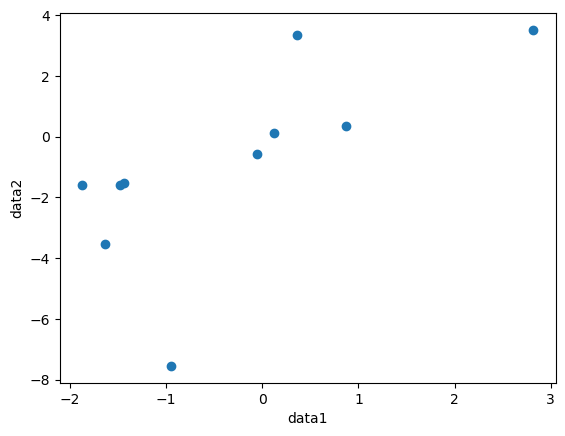

In [23]:
# Коэффициент корреляции и проверка гипотезы H0 - отсутствие корреляции

from scipy.stats import pearsonr


data1 = np.array([0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869])
data2 = np.array([0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579])

stat, p = pearsonr(data1, data2)
stat_1 = np.corrcoef(data1, data2)[0,1]

print(f'{stat=:.3f}, {p=:.3f}')
print(f'{stat_1=:.3f}')

if p > 0.05:
    print('Отсутствие корреляции')
else:
    print('Значения коэффентов по модулю:\n'
    '- Величина корреляции от 0 до 0.19: очень слабая зависимость\n' \
    '- Величина корреляции от 0.2 до 0.39: слабая зависимость\n' \
    '- Величина корреляции от 0.4 до 0.59: умеренная зависимость\n' \
    '- Величина корреляции от 0.6 до 0.79: достаточно сильная зависимость\n' \
    '- Величина корреляции от 0.8 до 1: очень сильная зависимость')

plt.scatter(data1, data2)
plt.xlabel('data1')
plt.ylabel('data2')
plt.show();

R=0.4733, b0=-0.4060, b1=1.5159


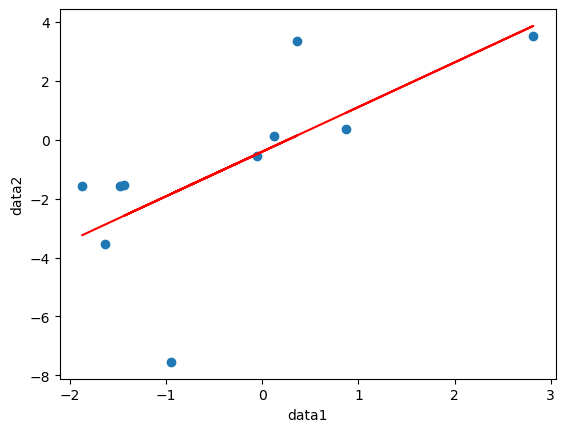

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data1.reshape(len(data1), 1), data2)
b0 = model.intercept_
b1 = model.coef_[0]
R = model.score(data1.reshape(len(data1),1), data2)

print(f'{R=:.4f}, {b0=:.4f}, {b1=:.4f}')

plt.scatter(data1, data2)
plt.plot(data1, b0 + b1 * data1, color='r')
plt.xlabel('data1')
plt.ylabel('data2')
plt.show();


In [5]:
from scipy.stats import shapiro

data2_pred = model.predict(data1.reshape(len(data1), 1))
result = data2 - data2_pred
print(shapiro(result))

ShapiroResult(statistic=0.8419689536094666, pvalue=0.046585824340581894)


In [6]:
result

array([-0.56444422, -0.34743109,  0.34754247, -5.70646576, -0.06565214,
        1.04686065,  3.21023287,  1.06853012, -0.64943546,  1.66026256])

In [7]:
data = pd.read_csv('ab_stats.csv')
data.sample(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
3635,0.0,0,0,A,7.755249
23515,0.0,0,0,B,3.266525
4679,0.0,0,0,A,6.605243
19875,0.0,0,0,B,2.083454
15804,0.0,0,0,B,-2.432951
6535,0.0,0,0,A,7.036950
20485,0.0,0,0,B,8.039385
11207,0.0,0,0,A,10.758905
14604,0.0,0,0,B,6.403136
16942,0.0,0,0,B,5.054355


In [42]:
data[['num_purchases', 'purchase']].corr(method='kendall')

,num_purchases,purchase
num_purchases,1.000000,0.997486
purchase,0.997486,1.000000


<AxesSubplot:xlabel='num_purchases', ylabel='revenue'>

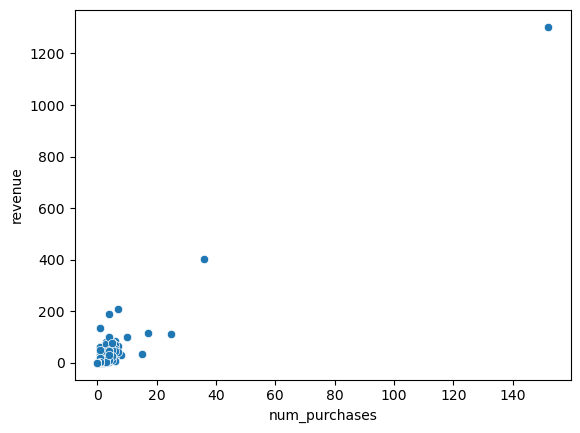

In [41]:
sns.scatterplot(data = data, x='num_purchases', y='revenue')

In [37]:
data[data['purchase']==1]['num_purchases'].isna().sum()

0

In [8]:
data.shape

(23652, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [10]:
data.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [11]:
data.isna().sum()

revenue          0
num_purchases    0
purchase         0
ab_group         0
av_site visit    0
dtype: int64

In [12]:
n_A = data.ab_group.value_counts()[0]
n_B = data.ab_group.value_counts()[1]
n_A, n_B

(11835, 11817)

In [13]:
data_A = data[data['ab_group'] == 'A']
data_B = data[data['ab_group'] == 'B']

In [14]:
# визиты на юзера av_site visit

data_A['av_site visit'].mean(), data_B['av_site visit'].mean()

(6.974724193166368, 7.051559066652976)

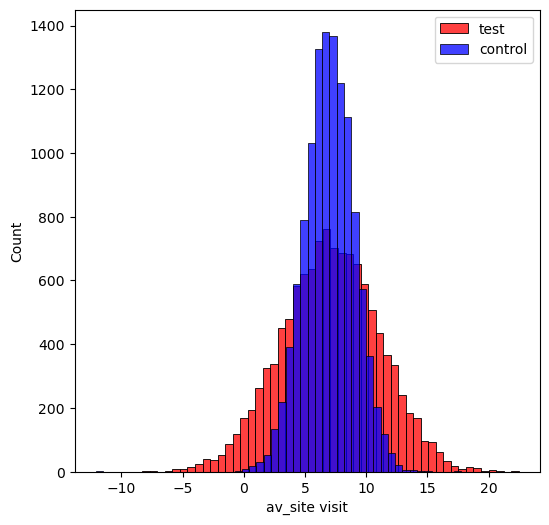

In [15]:
plt.figure(figsize=(6, 6))
sns.histplot(data_B['av_site visit'], color='r', label='test', bins=50)
sns.histplot(data_A['av_site visit'], color='b', label='control', bins=50)
plt.legend()
plt.show();

In [55]:
from scipy.stats import shapiro, bartlett, kstest

stat, p_value = kstest((data_A['av_site visit'] - data_A['av_site visit'].mean())/ data_A['av_site visit'].std(), 'norm')

print(f'A_нормальность: {stat=:.4f}, {p_value=:.4f}')

stat, p_value = kstest((data_B['av_site visit'] - data_B['av_site visit'].mean())/ data_B['av_site visit'].std(), 'norm')

print(f'B_нормальность: {stat=:.4f}, {p_value=:.4f}')

stat, p_value = bartlett(data_A['av_site visit'], data_B['av_site visit'])

print(f'Гомогенность дисперсий: {stat=:.4f}, {p_value=}')



A_нормальность: stat=0.0085, p_value=0.3615
B_нормальность: stat=0.0060, p_value=0.7862
Гомогенность дисперсий: stat=5032.4985, p_value=0.0


In [17]:
from scipy.stats import ttest_ind

p_value = ttest_ind(data_A['av_site visit'], data_B['av_site visit'])[1]

if p_value > 0.05:
    print(f'{p_value=:.3f} - нет статистически значимых различий')
else:
    print(f'{p_value=:.3f} - есть статистически значимых различий')

p_value=0.061 - нет статистически значимых различий


In [18]:
# Доля юзеров с покупкой

m_A = data_A['purchase'].sum()
m_B = data_B['purchase'].sum()
m_A, m_B

(256, 234)

In [19]:
# z-критерий

from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([m_A, m_B]), np.array([n_A, n_B]))

print(f'{z_score=:.4f}, {z_pvalue=:.4f}')

z_score=0.9873, z_pvalue=0.3235


In [20]:
# хи-квадрат

stat, p_value, _ = proportion.proportions_chisquare(np.array([m_A, m_B]), np.array([n_A, n_B]))
print(f'{stat=:.4f}, {p_value=:.4f}')


from scipy.stats import chi2_contingency

values = [[m_A, n_A - m_A], [m_B, n_B - m_B]]
stat, p_value, _, _ = chi2_contingency(values, correction=False)
print(f'{stat=:.4f}, {p_value=:.4f}')

stat=0.9747, p_value=0.3235
stat=0.9747, p_value=0.3235


In [21]:
data.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


In [72]:
# Метрика ARPU

control = data_A[data['purchase'] == 1]['revenue'].values
test = data_B[data['purchase'] == 1]['revenue'].values

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(control, test)
print(f'{stat=:.2f}, {p_value=:.4f}')

stat=29729.50, p_value=0.8872


In [63]:
df = data[data['purchase'] == 1]
df.sample(10)

,revenue,num_purchases,purchase,ab_group,av_site visit
45,1.885595,1,1,A,7.654627
4441,1.990000,1,1,A,1.663958
10579,208.303751,7,1,A,4.656105
3704,64.987165,3,1,A,7.725263
9603,3.914447,1,1,A,7.290411
13698,29.990000,1,1,B,11.711102
17125,1.990000,1,1,B,6.438497
6512,5.393568,1,1,A,6.866563
17772,4.546720,1,1,B,10.776987
21740,16.351089,3,1,B,6.973962


<AxesSubplot:xlabel='revenue', ylabel='Count'>

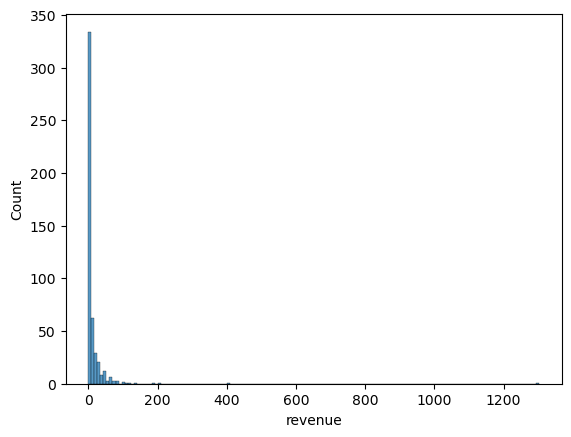

In [64]:
sns.histplot(df['revenue'], bins=150)

In [69]:
df97 = df[df['revenue'] < df['revenue'].quantile(0.975)]

<AxesSubplot:xlabel='revenue', ylabel='Count'>

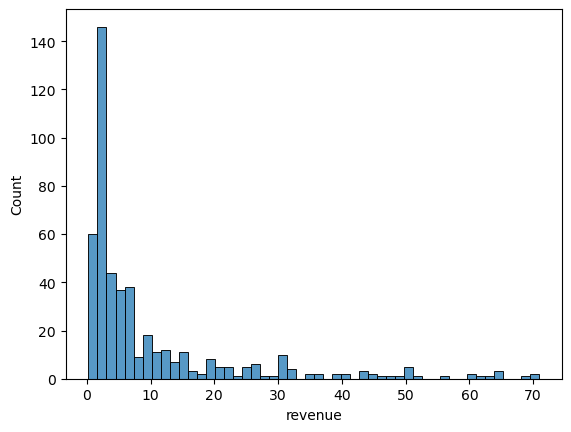

In [71]:
sns.histplot(df97['revenue'], bins=50)

In [76]:
df97_A = df97[df97['ab_group'] == 'A']
df97_B = df97[df97['ab_group'] == 'B']
control = df97_A[df97['purchase'] == 1]['revenue'].values
test = df97_B[df97['purchase'] == 1]['revenue'].values

from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(control, test)
print(f'{stat=:.2f}, {p_value=:.4f}')

stat=27866.50, p_value=0.7249


In [81]:
df97_A.shape[0], m_A, df97_B.shape[0], m_B

(248, 256, 229, 234)